In [1]:
import numpy as np
from obspy import read
from obspy.io.xseed import Parser
from obspy.imaging.spectrogram import _nearest_pow_2
from scipy import signal
import obspy
import matplotlib.pyplot as plt
from IPython.display import Image

from matplotlib import mlab, transforms
plt.rcParams['image.cmap'] = 'inferno'
import math as M
import matplotlib as mpl
import numpy.ma as ma
import time as time

from func.def_master import hps_algo

## Set Parameter for Station, Date, Filters

In [2]:
station = 'KNR07' ## Station
component = 'BHZ'
components = ['BHZ', 'BH1', 'BH2', 'BDH']## Component
#components = ['BHZ']
year = 2017
#day = '065'
startday = '050'
year= str(year)
decimate_factor = 5
pre_filt=(.001,.005,12,15) ## Parameter for filtering during response remove
#pre_filt=(.005,.006,10,12) ## Parameter for filtering during response remove
data_decimate_factor = 2
freq_min_bandpass = 1.1 ## filtercorners for filtering after response remove
freq_max_bandpass = 10 ## filtercorners for filtering after response remove
#per_lap = .9


In [3]:
#start_day = str(day)

year = str(year)

number_of_days = 6

threshold = -14
threshold = 10**(threshold)



#per_lap = .1




freq_minimal_value = 3
distance = 120
maxima= 1
decimate_factor = 1e-15

for j in range(len(components)):
    day = startday
    for i in range(number_of_days):
        print(day)
        ## Depends on workstation 
        #st_BHZ = read('../../2016/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + start_day)
        trace = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + components[j] + '.D/1B.' + station + '..' + components[j] + '.D.' + year + '.' + day)
        #parser01_BHZ = Parser('../../TEST_DATA/Resp/RESP.1B.' + station + '..' + component)
        resp_file = ('/data/cen/u254/Essing/AWI/Dataless_SEEDS/RESP.1B.' + station + '..' + components[j])
        trace = trace.decimate(factor=data_decimate_factor)
        fs = int(trace[0].stats.sampling_rate)
        trace_simu = trace.copy()
        trace_simu.simulate(paz_remove=None, pre_filt=pre_filt, seedresp={'filename': resp_file, 'units': 'DIS'})
        trace_simu_filt = trace_simu.copy()
        trace_simu_filt = trace_simu_filt.filter('bandpass',freqmin=freq_min_bandpass, freqmax=freq_max_bandpass)
        trace_data = np.array(trace_simu_filt[0].data)
        trace_data -= trace_data.mean()

        npts = len(trace_data)
        wlen = 80 # in seconds
        nfft = int(_nearest_pow_2(wlen * fs)) # number of datapoints used in each block for fft
        #nlap = int(nfft * float(per_lap))
        # hanning window is set to default in mlab.specgram
        specgram, freq, time = mlab.specgram(trace_data, Fs=fs, NFFT=nfft, noverlap=0)
        #print(np.shape(specgram_BHZ))
        #specgram_BHZ_masekd = ma.array(trace_data)
        #specgram_BHZ_masekd[0:1000,:] = ma.masked
        #specgram_BHZ_masekd[1300:np.shape(specgram_BHZ)[0],:] = ma.masked

        ### time arrangements
        
        if i==0 and j==0:
            specgram_appended_all_comps =  np.zeros((len(components), np.shape(specgram)[0], np.shape(specgram)[1]*number_of_days))
            first_date_1 = trace[0].stats.endtime.ctime()
            first_date = str(first_date_1[-4:]), '-', (first_date_1[4:7]), str(first_date_1[8:10])
            #all_days_amp_values = np.zeros((number_of_days, len(amplitude_values)))
            #all_days_freq_values = np.zeros((number_of_days, len(frequency_values)))
            time_stack = time
            
            
            fund_freq_value_appended = np.zeros((len(components), np.shape(specgram)[1]*number_of_days))
            fund_freq_value_all_appended =  np.zeros_like(fund_freq_value_appended)
            fund_freq_indi_appended = np.zeros_like(fund_freq_value_appended)
            fund_freq_amplitude_appended =  np.zeros_like(fund_freq_value_appended)
            fund_freq_amplitude_all_appended = np.zeros_like(fund_freq_value_appended)
            fund_freq_amplitude_all_muted_appended = np.zeros_like(fund_freq_value_appended)
        
        
        if i!=0 and j==0:
            time_stack = np.append(time_stack, time_stack[-1]+time)        
        
        
        
        if i==0:      
            specgram_appended = specgram        
        if i!=0:
            specgram_appended = np.append(specgram_appended, specgram, axis=1)
            
        if i==number_of_days-1:
            specgram_appended_all_comps[j,:,:] = specgram_appended
            #specgram_appended = 0
            #print('I was here')
        
        #print(np.shape(specgram_appended))
        
        #print(np.shape(fund_freq_value_appended), np.shape(fund_freq_indi_appended), np.shape(fund_freq_amplitude_appended))
    
    
        day = int(day) + 1
        day = (("%03d" % day))
    
    

    fund_freq_amplitude_all_appended[j,:],  fund_freq_amplitude_appended[j,:],fund_freq_amplitude_all_muted_appended[j,:], fund_freq_indi_appended[j,:],  fund_freq_value_appended[j,:],  fund_freq_value_all_appended[j,:] = hps_algo(input_data=specgram_appended, freq_range_input_data=freq, min_freq=-1, max_freq=0.0001, nr_downsamp=4,number_of_days=number_of_days, amp_threshold=threshold)
    #fund_freq_value_appended[j,:], fund_freq_indi_appended[j,:], fund_freq_amplitude_appended[j,:]  = hps_algo(input_data=specgram_appended, freq_range_input_data=freq, min_freq=-1, max_freq=0.0001, nr_downsamp=4, amp_threshold=threshold)

    
    ### Get amplitude at points in specgram without downsampling
    

050


/home/zmaw/u300967/.conda/envs/vgseis_2018/lib/python3.6/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


051
052
053
054
055
050
051
052
053
054
055
050
051
052
053
054
055
050
051
052
053
054
055


In [9]:
(np.shape(specgram_appended))[1]/6

1054.0

In [11]:
24*3600/1054

81.97343453510436

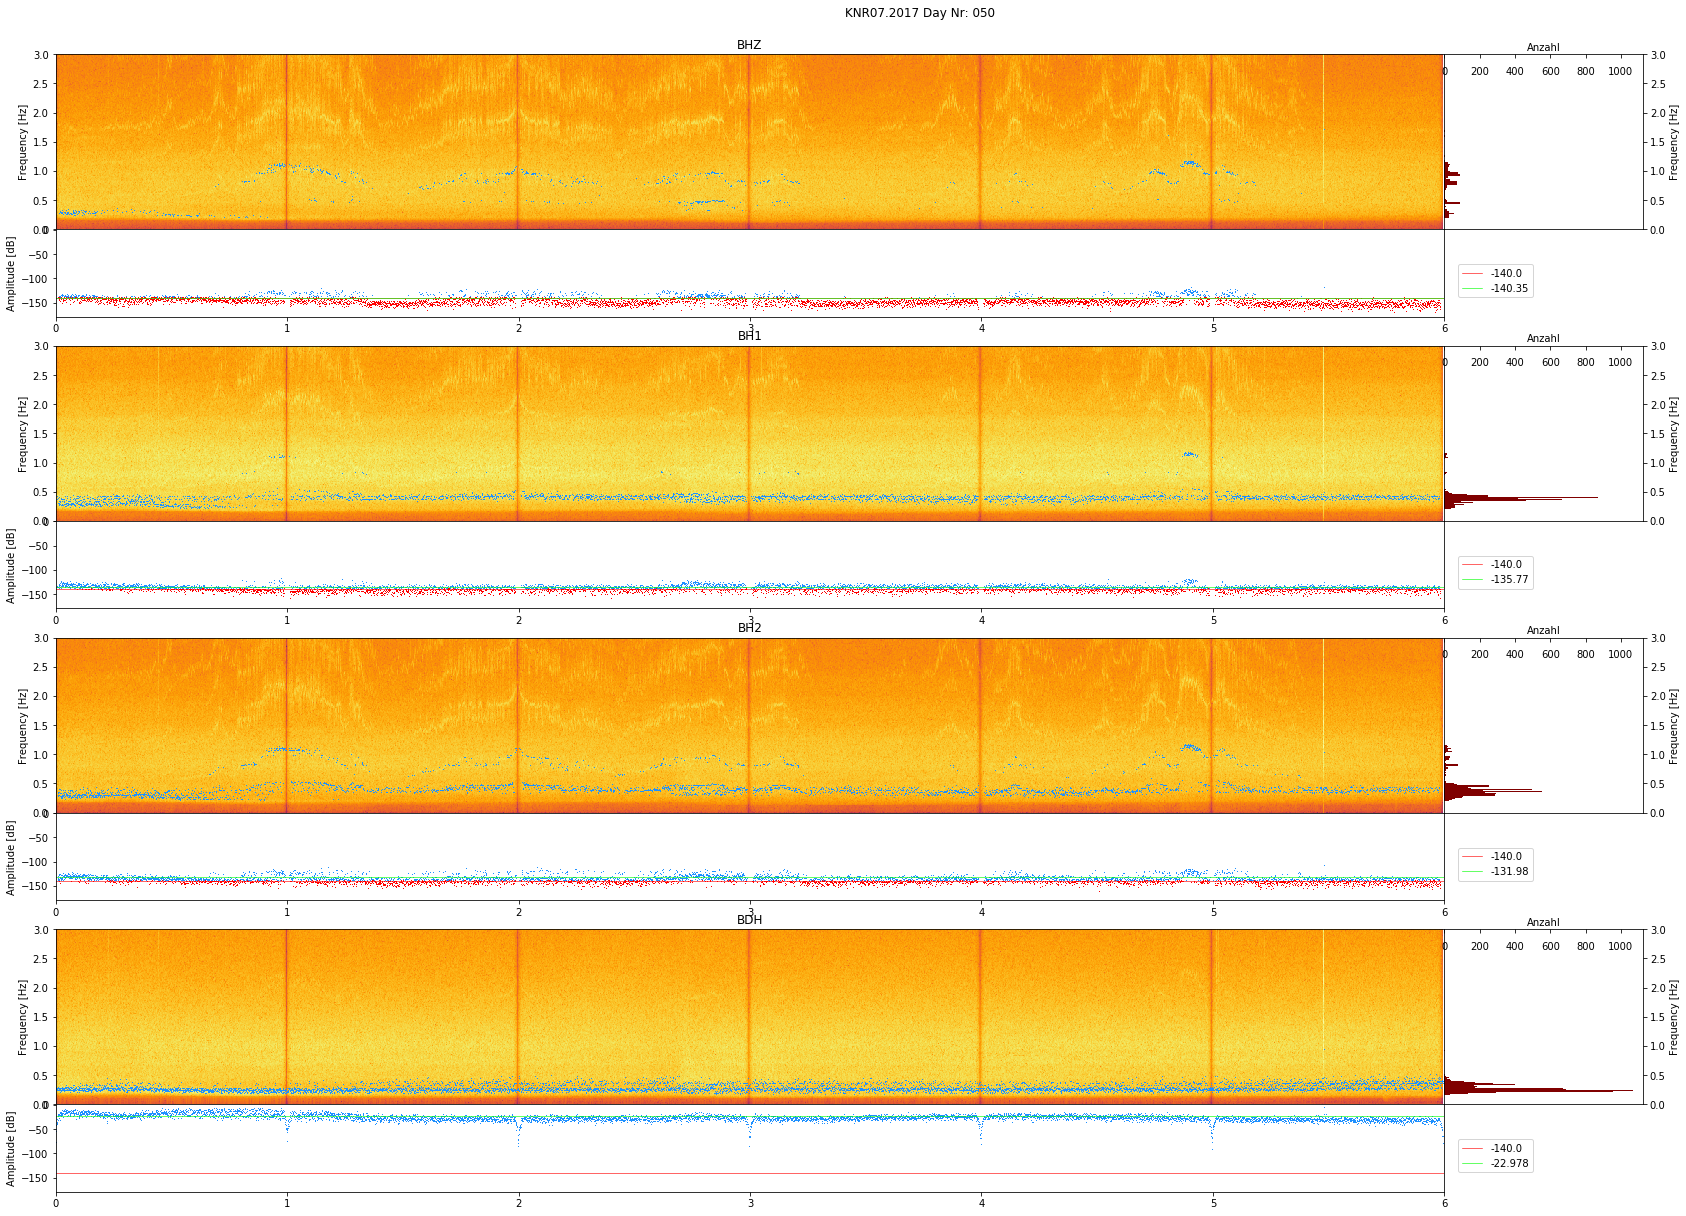

In [4]:
number_bins = 50
#threshold = -13
#threshold = 10**(threshold)
#number_of_days = 6
#print(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
gridsize = (41, 9)
fig = plt.figure(figsize=(32, 22))
fig.subplots_adjust(hspace=0, wspace=0)
#fig.suptitle(station + '.' + 'starttime: ' +  first_date)
#fig.suptitle(station + '.' + component + '_' + 'starttime: ' +  str(trace[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=7, rowspan=6)
ax2 = plt.subplot2grid(gridsize, (0, 7), colspan=1, rowspan=6, sharey=ax1)
ax3 = plt.subplot2grid(gridsize, (6, 0), colspan=7, rowspan=3)

ax4 = plt.subplot2grid(gridsize, (10, 0), colspan=7, rowspan=6, sharex=ax1, sharey=ax1)
ax5 = plt.subplot2grid(gridsize, (10, 7), colspan=1, rowspan=6, sharey=ax4, sharex=ax2)
ax6 = plt.subplot2grid(gridsize, (16, 0), colspan=7, rowspan=3, sharex=ax3, sharey=ax3)

ax7 = plt.subplot2grid(gridsize, (20, 0), colspan=7, rowspan=6, sharex=ax1, sharey=ax1)
ax8 = plt.subplot2grid(gridsize, (20, 7), colspan=1, rowspan=6, sharey=ax7, sharex=ax2)
ax9 = plt.subplot2grid(gridsize, (26, 0), colspan=7, rowspan=3, sharex=ax3, sharey=ax3)

ax10 = plt.subplot2grid(gridsize, (30, 0), colspan=7, rowspan=6, sharex=ax1, sharey=ax1)
ax11 = plt.subplot2grid(gridsize, (30, 7), colspan=1, rowspan=6, sharey=ax7, sharex=ax2)
ax12 = plt.subplot2grid(gridsize, (36, 0), colspan=7, rowspan=3, sharex=ax3, sharey=ax3)


ax1.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[0]))
ax1.plot(time_stack/3600/24,fund_freq_value_appended[0,:],',', color='dodgerblue')
#ax1.plot(time_stack/3600/24,fund_freq_value_all_appended[0,:],',', color='dodgerblue')
ax1.set_ylim(0,3)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlim(0,number_of_days)
ax1.title.set_text(components[0])
ax1.set_xticks([]) 

ax2.hist(fund_freq_value_appended[0,~np.isnan(fund_freq_value_appended[0,:])], bins=number_bins, color='maroon', orientation='horizontal')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Frequency [Hz]')
ax2.xaxis.tick_top()
ax2.tick_params(axis="x",direction="in", pad=-22)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Anzahl')

ax3.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[0,:]),',', color='red')
#ax3.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[0,:]),',', color='red')
ax3.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[0,:]),',', color='dodgerblue')
ax3.axhline(y=10*np.log10(threshold), color='red', linewidth=.6, label=10*np.log10(threshold))
mean0 = str(10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[0,:])))
ax3.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[0,:])), color='lime', lw=.6, label=mean0[0:7])
ax3.set_ylabel('Amplitude [dB]')
ax3.set_xlim(0, number_of_days)
ax3.legend(bbox_to_anchor=(1.01, .6), loc=2, borderaxespad=0.)


ax4.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[1,:,:]))
ax4.plot(time_stack/3600/24,fund_freq_value_appended[1,:],',', color='dodgerblue')
ax4.set_ylabel('Frequency [Hz]')
ax4.title.set_text(components[1])
ax4.set_xticks([]) 

ax5.hist(fund_freq_value_appended[1,~np.isnan(fund_freq_value_appended[1,])], bins=number_bins, color='maroon', orientation='horizontal')
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position('right')
ax5.set_ylabel('Frequency [Hz]')
ax5.xaxis.tick_top()
ax5.tick_params(axis="x",direction="in", pad=-22)
ax5.xaxis.set_label_position('top')
ax5.set_xlabel('Anzahl')

ax6.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[1,:]),',', color='red')
#ax6.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[1,:]),',', color='red')
ax6.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[1,:]),',', color='dodgerblue')
ax6.axhline(y=10*np.log10(threshold), color='red', linewidth=.6,  label=10*np.log10(threshold))
mean1 = str(10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[1,:])))
ax6.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[1,:])), color='lime', lw=.6, label=mean1[0:7])
ax6.set_ylabel('Amplitude [dB]')
ax6.legend(bbox_to_anchor=(1.01, .6), loc=2, borderaxespad=0.)

ax7.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[2,:,:]))
ax7.plot(time_stack/3600/24,fund_freq_value_appended[2,:],',', color='dodgerblue')
ax7.set_ylabel('Frequency [Hz]')
ax7.title.set_text(components[2])
ax7.set_xticks([]) 

ax8.hist(fund_freq_value_appended[2,~np.isnan(fund_freq_value_appended[2,:])], bins=number_bins, color='maroon', orientation='horizontal')
ax8.yaxis.tick_right()
ax8.yaxis.set_label_position('right')
ax8.set_ylabel('Frequency [Hz]')
ax8.xaxis.tick_top()
ax8.tick_params(axis="x",direction="in", pad=-22)
ax8.xaxis.set_label_position('top')
ax8.set_xlabel('Anzahl')

ax9.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[2,:]),',', color='red')
#ax9.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[2,:]),',', color='red')
ax9.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[2,:]),',', color='dodgerblue')
ax9.axhline(y=10*np.log10(threshold), color='red', linewidth=.6,  label=10*np.log10(threshold))
mean2 = str(10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[2,:])))
ax9.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[2,:])), color='lime', lw=.6, label=mean2[0:7])
ax9.set_ylabel('Amplitude [dB]')
ax9.legend(bbox_to_anchor=(1.01, .6), loc=2, borderaxespad=0.)

ax10.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[3,:,:]))
ax10.plot(time_stack/3600/24,fund_freq_value_appended[3,:],',', color='dodgerblue')
ax10.set_ylabel('Frequency [Hz]')
ax10.title.set_text(components[3])
ax10.set_xticks([]) 

ax11.hist(fund_freq_value_appended[3,~np.isnan(fund_freq_value_appended[3,:])], bins=number_bins, color='maroon', orientation='horizontal')
ax11.yaxis.tick_right()
ax11.yaxis.set_label_position('right')
ax11.set_ylabel('Frequency [Hz]')
ax11.xaxis.tick_top()
ax11.tick_params(axis="x",direction="in", pad=-22)
ax11.xaxis.set_label_position('top')
ax11.set_xlabel('Anzahl')

ax12.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[3,:]),',', color='red')
#ax12.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[2,:]),',', color='red')
ax12.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[3,:]),',', color='dodgerblue')
ax12.axhline(y=10*np.log10(threshold), color='red', linewidth=.6,  label=10*np.log10(threshold))
mean3 = str(10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[3,:])))
ax12.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[3,:])), color='lime', lw=.6, label=mean3[0:7])
ax12.set_ylabel('Amplitude [dB]')
ax12.legend(bbox_to_anchor=(1.01, .6), loc=2, borderaxespad=0.)

plt.suptitle((station+'.'+year+' Day Nr: '+startday), x=.5, y=.91)
plt.show()

In [ ]:
number_bins = 50
#threshold = -13
#threshold = 10**(threshold)
#number_of_days = 2
#print(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
gridsize = (8, 9)
fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(hspace=0, wspace=0)
#fig.suptitle(station + '.' + 'starttime: ' +  first_date)
#fig.suptitle(station + '.' + component + '_' + 'starttime: ' +  str(trace[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=8, rowspan=6)
#ax2 = plt.subplot2grid(gridsize, (0, 7), colspan=1, rowspan=6, sharey=ax1)
ax3 = plt.subplot2grid(gridsize, (6, 0), colspan=8, rowspan=3)


ax1.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[2]))
ax1.plot(time_stack/3600/24,fund_freq_value_all_appended[2,:],',', color='maroon')
ax1.plot(time_stack/3600/24,fund_freq_value_appended[2,:],',', color='dodgerblue')
#ax1.plot(time_stack/3600/24,fund_freq_value_all_appended[0,:],',', color='dodgerblue')
ax1.set_ylim(0,3)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlim(0,number_of_days)
ax1.title.set_text(components[2])
ax1.set_xticks([]) 

#ax2.hist(fund_freq_value_appended[2,~np.isnan(fund_freq_value_appended[2,:])], bins=number_bins, color='maroon', orientation='horizontal')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position('right')
#ax2.set_ylabel('Frequency [Hz]')
#ax2.xaxis.tick_top()
#ax2.tick_params(axis="x",direction="in", pad=-22)
#ax2.xaxis.set_label_position('top')
#ax2.set_xlabel('Anzahl')

ax3.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[2,:]),',', color='red')
#ax3.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[0,:]),',', color='red')
ax3.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[2,:]),',', color='dodgerblue')
ax3.axhline(y=10*np.log10(threshold), color='red', linewidth=.6, label=10*np.log10(threshold))
mean0 = str(10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[2,:])))
ax3.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[2,:])), color='lime', lw=.6, label=mean0[0:7])
ax3.set_ylabel('Amplitude [dB]')
ax3.set_xlim(0, number_of_days)
ax3.set_ylim(-160,-110)
ax3.legend(bbox_to_anchor=(1.01, .6), loc=2, borderaxespad=0.)
plt.suptitle((station+'.'+year+' Day Nr: '+startday + ' HPS'), x=.45, y=.95)
plt.show()

In [ ]:
#np.save('/data/cen/u254/Essing/AWI/arrays/fund_freq_value_appended_KNR07_40days', fund_freq_value_appended) 
#np.save('/data/cen/u254/Essing/AWI/arrays/fund_freq_indi_appended_KNR07_40days', fund_freq_indi_appended)
#np.save('/data/cen/u254/Essing/AWI/arrays/fund_freq_amplitude_appended_KNR07_40days', fund_freq_amplitude_appended)
#np.save('/data/cen/u254/Essing/AWI/arrays/fund_freq_amplitude_all_appended_KNR07_40days', fund_freq_amplitude_all_appended)
#np.save('/data/cen/u254/Essing/AWI/arrays/fund_freq_amplitude_all_muted_appended_KNR07_40days', fund_freq_amplitude_all_muted_appended)
#np.save('/data/cen/u254/Essing/AWI/arrays/specgram_appended_all_comps_KNR07_40days', specgram_appended_all_comps)
#np.save('frequency_values_KNR12_40days', frequency_values)
#np.save('/data/cen/u254/Essing/AWI/arrays/time_stack_40_days', time_stack)
#np.save('/data/cen/u254/Essing/AWI/arrays/freq', freq)

In [ ]:
#fund_freq_value_appended = np.load('/data/cen/u254/Essing/AWI/arrays/fund_freq_value_appended_KNR07_40days.npy') 
#fund_freq_indi_appended = np.load('/data/cen/u254/Essing/AWI/arrays/fund_freq_indi_appended_KNR12_40days', fund_freq_indi_appended)
#fund_freq_amplitude_appended = np.load('/data/cen/u254/Essing/AWI/arrays/fund_freq_amplitude_appended_KNR07_40days.npy')
#fund_freq_amplitude_all_appended = np.load('/data/cen/u254/Essing/AWI/arrays/fund_freq_amplitude_all_appended_KNR07_40days.npy')
#fund_freq_amplitude_all_muted_appended = np.load('/data/cen/u254/Essing/AWI/arrays/fund_freq_amplitude_all_muted_appended_KNR07_40days.npy')
#specgram_appended_all_comps = np.load('/data/cen/u254/Essing/AWI/arrays/specgram_appended_all_comps_KNR07_40days.npy')
#np.save('frequency_values_KNR12_40days', frequency_values)
#time_stack = np.load('/data/cen/u254/Essing/AWI/arrays/time_stack_40_days.npy')
#freq = np.load('/data/cen/u254/Essing/AWI/arrays/freq.npy')

In [ ]:
threshold = -13
threshold = 10**(threshold)


gridsize = (25, 9)
fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0, wspace=0)
fig.suptitle(station)
#fig.suptitle(station + '.' + component + '_' + 'starttime: ' +  str(trace[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=6, rowspan=6)
ax2 = plt.subplot2grid(gridsize, (6, 0), colspan=6, rowspan=6, sharex=ax1)
ax3 = plt.subplot2grid(gridsize, (12, 0), colspan=6, rowspan=6, sharex=ax1)


ax1.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[0,:]), ',')
#ax1.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
ax1.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[0,:])), color='lime', lw=.6, label='mean')
ax1.axhline(y=10*np.log10(np.mean(fund_freq_amplitude_all_appended[0,:])), color='red', lw=.6, label='mean')

ax2.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[1,:]), ',')
#ax2.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
ax2.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[1,:])), color='lime', lw=.6, label='mean')
ax2.axhline(y=10*np.log10(np.mean(fund_freq_amplitude_all_appended[1,:])), color='red', lw=.6, label='mean')
ax3.plot(time_stack/3600/24, 10*np.log10(fund_freq_amplitude_all_muted_appended[2,:]), ',')
#ax3.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
ax3.axhline(y=10*np.log10(np.nanmean(fund_freq_amplitude_all_muted_appended[2,:])), color='lime', lw=.6, label=10*np.log10(threshold))
meanit = str(10*np.log10(np.mean(fund_freq_amplitude_all_appended[2,:])))
ax3.axhline(y=meanit, color='red', lw=.6, label=meanit[0:7])
ax3.set_ylim(-130,-129)
ax3.legend(bbox_to_anchor=(1.01, .5), loc=2, borderaxespad=0.)
plt.suptitle((station+'.'+year+' Day Nr: '+startday), x=.5, y=.92)
plt.show()

In [ ]:
print(10*np.log10(threshold))

In [ ]:
plt.figure(figsize=(15,8))
plt.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[0]))
plt.show()

In [ ]:
number_bins = 50
#print(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
gridsize = (25, 9)
fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0, wspace=0)
fig.suptitle(station + '.' + 'starttime: ' +  first_date)
#fig.suptitle(station + '.' + component + '_' + 'starttime: ' +  str(trace[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=6, rowspan=4)
ax2 = plt.subplot2grid(gridsize, (0, 6), colspan=2, rowspan=4, sharey=ax1)
ax3 = plt.subplot2grid(gridsize, (4, 0), colspan=6, rowspan=2, sharex=ax1)

ax4 = plt.subplot2grid(gridsize, (6, 0), colspan=6, rowspan=4, sharex=ax1)
ax5 = plt.subplot2grid(gridsize, (6, 6), colspan=2, rowspan=4, sharey=ax4)
ax6 = plt.subplot2grid(gridsize, (10, 0), colspan=6, rowspan=2, sharex=ax1)

ax7 = plt.subplot2grid(gridsize, (12, 0), colspan=6, rowspan=4, sharex=ax1)
ax8 = plt.subplot2grid(gridsize, (12, 6), colspan=2, rowspan=4, sharey=ax7)
ax9 = plt.subplot2grid(gridsize, (16, 0), colspan=6, rowspan=2, sharex=ax1)

ax10 = plt.subplot2grid(gridsize, (18, 0), colspan=6, rowspan=4, sharex=ax1)
ax11 = plt.subplot2grid(gridsize, (18, 6), colspan=2, rowspan=4, sharey=ax10)
ax12 = plt.subplot2grid(gridsize, (22, 0), colspan=6, rowspan=2, sharex=ax1)

#ax7 = plt.subplot2grid(gridsize, (18, 0), colspan=6, rowspan=4)
#ax8 = plt.subplot2grid(gridsize, (22, 0), colspan=6, rowspan=2)
#ax12


ax1.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[0]))
ax1.plot(time_stack/3600/24,fund_freq_value_appended[0,:],',', color='dodgerblue')
ax1.plot(time_stack/3600/24,fund_freq_value_all_appended[0,:],',', color='dodgerblue')
ax1.set_ylim(0,3)
ax1.set_xlim(0,number_of_days)

ax2.hist(fund_freq_value_appended[0,~np.isnan(fund_freq_value_appended[0,:])], bins=number_bins, color='maroon', orientation='horizontal')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Frequency [Hz]')
ax2.xaxis.tick_top()
ax2.tick_params(axis="x",direction="in", pad=-22)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Anzahl')


ax3.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[0,:]),',', color='red')
ax3.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[0,:]),',', color='dodgerblue')
ax3.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
ax3.axhline(y=-100, color='green', linewidth=.6)
ax3.set_ylim(-250,-90)

ax4.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[1,:,:]))
ax4.plot(time_stack/3600/24,fund_freq_value_appended[1,:],',', color='dodgerblue')
ax4.set_ylim(0,3)
#ax3.set_xlim(0,50)

ax5.hist(fund_freq_value_appended[1,~np.isnan(fund_freq_value_appended[1,])], bins=number_bins, color='maroon', orientation='horizontal')
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position('right')
ax5.set_ylabel('Frequency [Hz]')
ax5.xaxis.tick_top()
ax5.tick_params(axis="x",direction="in", pad=-22)
ax5.xaxis.set_label_position('top')
ax5.set_xlabel('Anzahl')


ax6.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[1,:]),',', color='red')
ax6.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[1,:]),',', color='dodgerblue')
ax6.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
ax6.axhline(y=-100, color='green', linewidth=.6)
#ax6.set_xlim(0,48)
ax6.set_ylim(-150,-90)

ax7.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[2,:,:]))
ax7.plot(time_stack/3600/24,fund_freq_value_appended[2,:],',', color='dodgerblue')
ax7.set_ylim(0,3)
#ax5.set_xlim(0,50)

ax8.hist(fund_freq_value_appended[2,~np.isnan(fund_freq_value_appended[2,:])], bins=number_bins, color='maroon', orientation='horizontal')
ax8.yaxis.tick_right()
ax8.yaxis.set_label_position('right')
ax8.set_ylabel('Frequency [Hz]')
ax8.xaxis.tick_top()
ax8.tick_params(axis="x",direction="in", pad=-22)
ax8.xaxis.set_label_position('top')
ax8.set_xlabel('Anzahl')


ax9.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[2,:]),',', color='red')
ax9.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[2,:]),',', color='dodgerblue')
ax9.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
ax9.axhline(y=-100, color='green', linewidth=.6)
ax9.set_ylim(-150,-90)


ax10.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[3,:,:]))
ax10.plot(time_stack/3600/24,fund_freq_value_appended[3,:],',', color='dodgerblue')
ax10.set_ylim(0,3)
#ax10.set_xlim(0,50)

ax11.hist(fund_freq_value_appended[3,~np.isnan(fund_freq_value_appended[3,:])], bins=number_bins, color='maroon', orientation='horizontal')
ax11.yaxis.tick_right()
ax11.yaxis.set_label_position('right')
ax11.set_ylabel('Frequency [Hz]')
ax11.xaxis.tick_top()
ax11.tick_params(axis="x",direction="in", pad=-22)
ax11.xaxis.set_label_position('top')
ax11.set_xlabel('Anzahl')


ax12.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[3,:]),',', color='red')
ax12.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[3,:]),',', color='dodgerblue')
ax12.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
ax12.axhline(y=-100, color='green', linewidth=.6)
#ax12.set_ylim(-250,-90)


#ax5.pcolormesh(time_stack/3600/24, freq, 10*np.log10(specgram_appended_all_comps[2,:,:]))
#ax5.plot(time_stack/3600/24,fund_freq_value_appended[2,:],',', color='dodgerblue')
#ax5.set_ylim(0,3)
#ax5.set_xlim(0,50)


#ax6.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_all_appended[2,:]),',', color='red')
#ax6.plot(time_stack/3600/24,10*np.log10(fund_freq_amplitude_appended[2,:]),',', color='dodgerblue')
#ax6.axhline(y=10*np.log10(threshold), color='red', linewidth=.6)
#ax6.axhline(y=-100, color='green', linewidth=.6)
#ax6.set_ylim(-150,-90)
#ax6.set_xlim(0,48)
    
plt.show()

In [ ]:
test = np.zeros(15)
test = test + 1
test[:5] = np.nan
test[-5:] = np.nan

print(test)

In [ ]:
time_win = np.array([284,602,843])

number_bins= 50

color_set = ['maroon',  'grey',  'navy']

print(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
gridsize = (9, 7)
fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0, wspace=0)
fig.suptitle(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=6, rowspan=4)
#ax2 = plt.subplot2grid(gridsize, (0, 6), colspan=1, rowspan=4)
ax3 = plt.subplot2grid(gridsize, (4, 0), colspan=6, rowspan=2, sharex=ax1)
ax4 = plt.subplot2grid(gridsize, (4, 6), colspan=1, rowspan=2, sharey=ax3)
ax5 = plt.subplot2grid(gridsize, (6, 0), colspan=6, rowspan=2, sharex=ax1)
ax6 = plt.subplot2grid(gridsize, (6, 6), colspan=1, rowspan=2, sharey=ax3)
ax7 = plt.subplot2grid(gridsize, (8, 0), colspan=6, rowspan=1, sharex=ax1)




ax1.pcolormesh(time_stack/3600, freq, 10*np.log10(specgram_appended))
#ax1.axhline(y=freq[lower_last_indi_to_use], linewidth=.79, color='red')
#ax1.axhline(y=freq[upper_first_indi_to_use], linewidth=.79, color='red')
#for i in range(len(time_win)):
    #ax1.axvline(x=time[time_win[i]]/3600, linewidth=.65, color=color_set[i])
ax1.axvline(x=5, linewidth=.65, color='grey')
ax1.axvline(x=10, linewidth=.65, color='grey')
ax1.axvline(x=15, linewidth=.65, color='grey')
ax1.axvline(x=20, linewidth=.65, color='grey')
ax1.plot(time_stack/3600,fund_freq_value_appended, ',')
ax1.set_ylabel('Frequency [Hz]')
#ax1.set_title(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
ax1.set_ylim(0,12)
#ax1.set_yticklabels([_,2,4,6,8,10,12])

#for i in range(len(time_win)):
    #print(amp_values[i], frequency_values[i])
    #ax2.plot(10*np.log10(specgram_BHZ[:,i]),freq, color=color_set[i], label=(round(float(time[time_win[i]]/3600), ndigits=2)))
    #ax2.plot(10*np.log10(amp_values[i]), frequency_values_all[i],  'o',color=color_set[i])
    #ax7.legend(bbox_to_anchor=(.5, -.2), loc='lower center', borderaxespad=0.)
#ax2.axhline(y=upper_minval_freq, linewidth=.99, color='red')
#ax2.axhline(y=lower_maxval_freq,  linewidth=.99, color='red')
#ax2.grid()
#ax2.set_xlim(-300,-150)
#ax2.set_ylim(lower_maxval_freq-.2, upper_minval_freq+.3)
#ax7.set_ylim(lower_maxval_freq, upper_minval_freq+.5)
#ax2.xaxis.tick_top()
#ax2.yaxis.tick_right()

ax3.pcolormesh(time_stack/3600, freq, 10*np.log10(specgram_appended))
ax3.plot(time_stack/3600,fund_freq_value_appended,',', color='maroon')
ax3.set_ylim(0.1,1)
#ax3.set_ylim(lower_maxval_freq-.01, upper_minval_freq)
#ax3.axvline(x=5, linewidth=.65, color='grey')
#ax3.axvline(x=10, linewidth=.65, color='grey')
#ax3.axvline(x=15, linewidth=.65, color='grey')
#ax3.axvline(x=20, linewidth=.65, color='grey')
#for i in range(len(time_win)):
    #ax3.axvline(x=time[time_win[i]]/3600, linewidth=.65, color=color_set[i])
ax3.set_ylabel('Frequency [Hz]')

#ax4.hist(frequency_values[~np.isnan(frequency_values)], bins=24, orientation='horizontal')
ax4.hist(fund_freq_value_appended[~np.isnan(fund_freq_value_appended)], bins=number_bins, color='maroon', orientation='horizontal')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right')
ax4.set_ylabel('Frequency [Hz]')
ax4.xaxis.tick_top()
ax4.tick_params(axis="x",direction="in", pad=-22)
ax4.xaxis.set_label_position('top')
ax4.set_xlabel('Anzahl')

#ax5.pcolormesh(time_stack/3600, freq, 10*np.log10(funda_freq_amp_masekd))
#ax5.plot(time_stack/3600,frequency_values_all,',', color='dodgerblue')
#ax5.set_ylim(lower_maxval_freq-.01, upper_minval_freq)
#ax5.axvline(x=5, linewidth=.65, color='grey')
#ax5.axvline(x=10, linewidth=.65, color='grey')
#ax5.axvline(x=15, linewidth=.65, color='grey')
#ax5.axvline(x=20, linewidth=.65, color='grey')
#for i in range(len(time_win)):
    #ax5.axvline(x=time[time_win[i]]/3600, linewidth=.65, color=color_set[i])
#ax5.set_ylabel('Frequency [Hz]')


#ax6.hist(frequency_values_all, bins=number_bins, color='dodgerblue', orientation='horizontal')
#ax6.hist(frequency_values_all, bins=24, color='red', orientation='horizontal')
#ax6.yaxis.tick_right()
#ax6.yaxis.set_label_position('right')
#ax6.set_ylabel('Frequency [Hz]')
#ax6.set_xlabel('Anzahl')

ax7.plot(time_stack/3600,10*np.log10(fund_freq_amplitude_appended), ',', color='dodgerblue')
#ax7.plot(time_stack/3600,10*np.log10(amplitude_values), ',', color='maroon')
ax7.axhline(y=(10*np.log10(threshold)), linewidth=.8, color='red', label=('Threshold', 10*np.log10(threshold), 'dB'))
#ax7.set_ylim(-150,-100)
#for i in range(len(time_win)):
    #ax7.axvline(x=time[time_win[i]]/3600, linewidth=.65, color=color_set[i])
#ax7.axvline(x=5, linewidth=.65, color='grey')
#ax7.axvline(x=10, linewidth=.65, color='grey')
#ax7.axvline(x=15, linewidth=.65, color='grey')
#ax7.axvline(x=20, linewidth=.65, color='grey')
#ax7.set_xlim(0,24)
#ax7.set_ylim(10**-14,10**-11)
ax7.set_ylabel('Amplitude [dB]')
ax7.set_xlabel('Hours [h]')
ax7.legend(bbox_to_anchor=(1, 0.395), loc='center left', borderaxespad=0.)




plt.show()

In [ ]:
st_BHZ = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + start_day)
resp_file = ('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component)

#st_BH1 = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component1 + '.D/1B.' + station + '..' + component1 + '.D.' + year + '.' + start_day)
#resp_file1 = ('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component1)

st_BH2 = read('/data/cen/u254/Essing/AWI/KNIPA_NEW/' + year + '/1B/' + station + '/' + component2 + '.D/1B.' + station + '..' + component2 + '.D.' + year + '.' + start_day)
resp_file2 = ('/data/cen/u254/Essing/AWI/CAL/RESP.1B.' + station + '..' + component2)

#st_BHZ = read('/home/david/AWI/' + year + '/1B/' + station + '/' + component + '.D/1B.' + station + '..' + component + '.D.' + year + '.' + start_day)
#resp_file = ('/home/david/AWI/CAL/RESP.1B.' + station + '..' + component)

In [ ]:
st_BHZ = st_BHZ.decimate(factor=decimate_factor)
fs = int(st_BHZ[0].stats.sampling_rate)
st_BHZ_simu = st_BHZ.copy()
st_BHZ_simu.simulate(paz_remove=None, pre_filt=pre_filt, seedresp={'filename': resp_file, 'units': 'DIS'})


st_BHZ_simu_filt = st_BHZ_simu.copy()
st_BHZ_simu_filt = st_BHZ_simu_filt.filter('bandpass',freqmin=freq_min_bandpass, freqmax=freq_max_bandpass)
#st_BHZ_simu_filt.merge()
data_BHZ = np.array(st_BHZ_simu_filt[0].data)
#demean? WHY
data_BHZ -= data_BHZ.mean()


npts = len(data_BHZ) ## number of datapts
wlen = float(fs*3) ## wlen for calculation of spectrogram 
nfft = int(_nearest_pow_2(wlen * fs)) ## nfft?


# hanning window is set to default in mlab.specgram  
specgram_BHZ, freq, time = mlab.specgram(data_BHZ, Fs=fs, NFFT=nfft)
#specgram_BHZ_overlab, freq, time = mlab.specgram(data_BHZ, Fs=fs, NFFT=nfft, noverlap=0.1)
#specgram_BHZ_nonoverlab, freq, time = mlab.specgram(data_BHZ, Fs=fs, NFFT=nfft)

In [ ]:
st_BH1 = st_BH1.decimate(factor=decimate_factor)
fs = int(st_BH1[0].stats.sampling_rate)
st_BH1_simu = st_BH1.copy()
st_BH1_simu.simulate(paz_remove=None, pre_filt=pre_filt, seedresp={'filename': resp_file1, 'units': 'DIS'})


st_BH1_simu_filt = st_BH1_simu.copy()
st_BH1_simu_filt = st_BH1_simu_filt.filter('bandpass',freqmin=freq_min_bandpass, freqmax=freq_max_bandpass)
#st_BHZ_simu_filt.merge()
data_BH1 = np.array(st_BH1_simu_filt[0].data)
data_BH1 -= data_BH1.mean()


npts = len(data_BH1) ## number of datapts
wlen = float(fs*3) ## wlen for calculation of spectrogram 
nfft = int(_nearest_pow_2(wlen * fs)) ## nfft?


# hanning window is set to default in mlab.specgram  
specgram_BH1, freq, time = mlab.specgram(data_BH1, Fs=fs, NFFT=nfft)
#specgram_BHZ_overlab, freq, time = mlab.specgram(data_BHZ, Fs=fs, NFFT=nfft, noverlap=0.1)
#specgram_BHZ_nonoverlab, freq, time = mlab.specgram(data_BHZ, Fs=fs, NFFT=nfft)

In [ ]:
st_BH2 = st_BH2.decimate(factor=decimate_factor)
fs = int(st_BH2[0].stats.sampling_rate)
st_BH2_simu = st_BH2.copy()
st_BH2_simu.simulate(paz_remove=None, pre_filt=pre_filt, seedresp={'filename': resp_file2, 'units': 'DIS'})


st_BH2_simu_filt = st_BH2_simu.copy()
st_BH2_simu_filt = st_BH2_simu_filt.filter('bandpass',freqmin=freq_min_bandpass, freqmax=freq_max_bandpass)
#st_BHZ_simu_filt.merge()
data_BH2 = np.array(st_BH2_simu_filt[0].data)
data_BH2 -= data_BH2.mean()


npts = len(data_BH2) ## number of datapts
wlen = float(fs*3) ## wlen for calculation of spectrogram 
nfft = int(_nearest_pow_2(wlen * fs)) ## nfft?

time_data = np.linspace(0, len(data_BH2)/fs,  len(data_BH2)) 

# hanning window is set to default in mlab.specgram  
specgram_BH2, freq, time = mlab.specgram(data_BH2, Fs=fs, NFFT=nfft)
#specgram_BHZ_overlab, freq, time = mlab.specgram(data_BHZ, Fs=fs, NFFT=nfft, noverlap=0.1)
#specgram_BHZ_nonoverlab, freq, time = mlab.specgram(data_BHZ, Fs=fs, NFFT=nfft)

## Plotting Specgram |

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every .5

major_ticks =  np.linspace(0, 25, 26)
minor_ticks = np.linspace(0, 25, 51)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

ax.pcolormesh(time/3600, freq, 10*np.log10(specgram_BHZ), cmap='inferno')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)
ax.grid(alpha=.49)


ax.set_xlabel('Time [h]')
ax.set_ylabel('Frequency [Hz]')
ax.set_title(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
#plt.savefig(fname = (station + '.' + component + '_' + 'starttime:_' +  str(st_BHZ[0].stats.starttime)[0:19]+ 'TEST.png'))


plt.show()

In [ ]:
print(np.floor(np.shape(specgram_BHZ)[1]/24*10))
print(np.shape(specgram_BHZ))
print(np.shape(freq))

In [ ]:
hour = np.linspace(5, 14, 91)
for i in range(len(hour)):
    print(((hour[i])))

In [ ]:
hour = [21.4,21.6]
import matplotlib.gridspec as gridspec

#hour = np.linspace(5, 14, 91)
#hour = np.linspace(3, 3.6, 6)
#hour = [13.0,13.4,14.0,14.4,14.8,15.2, 15.6]

major_ticks =  np.linspace(0, 4, 9)
minor_ticks = np.linspace(0, 4, 9)

for i in range(len(hour)):
    #print(((hour[i])))


    number_of_fft = int(np.floor(np.shape(specgram_BHZ)[1]/24*hour[i]))




    fig= plt.figure(figsize=(16,12))
    gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 2])


    #f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(16,8))
    ax2 = fig.add_subplot(gs[0, :])
    ax2.semilogy(freq, specgram_BHZ[:,number_of_fft], label='BHZ')
    ax2.set_title('Components')
    ax2.semilogy(freq, specgram_BH1[:,number_of_fft], label='BH1')
    ax2.axvline(x=.5, linewidth=.8, color='black')
    ax2.semilogy(freq, specgram_BH2[:,number_of_fft], label='BH2')
    ax2.set_xlim(0.1,5)
    ax2.set_ylim(10e-23, 10e-10)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.grid()
    ax2.legend()
    ax4 = fig.add_subplot(gs[1:, :])
    ax4.set_yticks(major_ticks)
    ax4.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax4.grid(which='both')
    ax4.grid(which='minor', alpha=0.8)
    ax4.grid(which='major', alpha=0.8)
    ax4.grid(alpha=.95)
    
    
    
    ax4.set_xlabel('Time [h]')
    ax4.set_ylabel('Frequency [Hz]')
    ax4.set_title(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
    ax4.pcolormesh(time/3600, freq, 10*np.log10(specgram_BH2), cmap='inferno')
    ax4.axvline(x=hour[i], linewidth=.4, color='black')
    fig.suptitle('comparison between Components')
    #plt.savefig(fname = (station + '.' + component + '_' + 'starttime:_' +  str(st_BHZ[0].stats.starttime)[0:19]+ 'actual_hour' + str(hour[i]) +'comparison between Components.png'))
    #plt.clf()
    plt.show()

In [ ]:
minval_freq = 20
maxval_freq = 25
freq_values = freq[np.where(np.logical_and(freq>minval_freq, freq<maxval_freq))]
first_indi_to_use = np.where(freq == freq_values[0])[0]
last_indi_to_use = np.where(freq == freq_values[-1])[0]

funda_freq_amp_masekd = ma.array(specgram_BHZ)
funda_freq_amp_masekd[int(first_indi_to_use):int(last_indi_to_use),:] = ma.masked(fill_value=0)

In [ ]:
print(np.shape(specgram_BHZ)[0]/24*10)

In [ ]:
plt.plot(freq, funda_freq_amp_masekd[:,425:426])
#plt.xlim(2,12)
plt.show()

## Hier geht es gerade los

In [ ]:
threshold = -59
threshold = 10**(threshold)
print(10*np.log10(threshold))

fund_freq_value, fund_freq_indi, fund_freq_amplitude  = hps_algo(input_data=specgram_BH2, freq_range_input_data=freq, min_freq=-1, max_freq=0.0001, nr_downsamp=4, amp_threshold=threshold)

In [ ]:
gridsize = (5, 7)
number_bins= 10
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0, wspace=0)
fig.suptitle(station + '.' + component2 + '_' + 'starttime: ' +  str(st_BH2[0].stats.starttime)[0:19])

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=6, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 0), colspan=6, rowspan=2)
ax4 = plt.subplot2grid(gridsize, (2, 6), colspan=1, rowspan=2, sharey=ax3)
ax5 = plt.subplot2grid(gridsize, (4, 0), colspan=6, rowspan=1, sharex=ax1)





ax1.plot(time_data/3600,data_BH2)
ax1.set_ylabel('Displacement [m]')
ax1.axvline(x=5, linewidth=.65, color='grey')
ax1.axvline(x=10, linewidth=.65, color='grey')
ax1.axvline(x=15, linewidth=.65, color='grey')
ax1.axvline(x=20, linewidth=.65, color='grey')
ax1.set_xlim(0,24)


ax3.plot(time/3600,(fund_freq_value), '.')
ax3.pcolormesh(time/3600, freq,10*np.log10(specgram_BH2))
ax3.axvline(x=5, linewidth=.65, color='grey')
ax3.axvline(x=10, linewidth=.65, color='grey')
ax3.axvline(x=15, linewidth=.65, color='grey')
ax3.axvline(x=20, linewidth=.65, color='grey')
ax3.set_xlim(0,24)
ax3.set_ylim(0,1.75)
ax3.set_ylabel('Frequency [Hz]]')

ax4.hist(fund_freq_value[~np.isnan(fund_freq_value)], bins=number_bins, color='maroon', orientation='horizontal')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right')
ax4.set_ylabel('Frequency [Hz]')
ax4.xaxis.tick_top()
ax4.tick_params(axis="x",direction="in", pad=-22)
ax4.xaxis.set_label_position('top')
ax4.set_xlabel('Anzahl')

ax5.plot(time/3600,10*np.log10(fund_freq_amplitude), '.')
ax5.axhline(y=(10*np.log10(threshold)), linewidth=.8, color='red', label=('Threshold', 10*np.log10(threshold), 'dB'))
ax5.axvline(x=5, linewidth=.65, color='grey')
ax5.axvline(x=10, linewidth=.65, color='grey')
ax5.axvline(x=15, linewidth=.65, color='grey')
ax5.axvline(x=20, linewidth=.65, color='grey')
ax5.set_ylim(-600,-450)
ax5.set_ylabel('Amplitude [dB]')
ax5.set_xlabel('Hours [h]')
ax5.legend(bbox_to_anchor=(1, 0.395), loc='center left', borderaxespad=0.)

plt.show()

In [ ]:
print(np.shape(specgram_BH2)[1]/24*15)

In [ ]:
plt.plot(freq,10*np.log10(specgram_BH2[:,690:720]))
#plt.plot(freq,10*np.log10(specgram_BH2[:,88]))
plt.xlim(0,8)
plt.ylim(-140,-100)
plt.grid()
#plt.plot(freq, np.abs(specgram_BH2[:,88]))
plt.show()

In [ ]:
#print((fund_freq_amplitude[~np.isnan(fund_freq_amplitude)])[-10:])
print(np.mean(fund_freq_amplitude[~np.isnan(fund_freq_amplitude)]))

In [ ]:
time_win = np.array([284,602,843])

number_bins= 10

color_set = ['maroon',  'grey',  'navy']

print(station + '.' + component2 + '_' + 'starttime: ' +  str(st_BH2[0].stats.starttime)[0:19])
gridsize = (5, 7)
fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0, wspace=0)
fig.suptitle(station + '.' + component2 + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=6, rowspan=4)
#ax2 = plt.subplot2grid(gridsize, (0, 6), colspan=1, rowspan=4, sharex=ax1)
ax3 = plt.subplot2grid(gridsize, (4, 0), colspan=6, rowspan=2, sharex=ax1)
ax4 = plt.subplot2grid(gridsize, (4, 6), colspan=1, rowspan=2, sharey=ax3)
#ax5 = plt.subplot2grid(gridsize, (6, 0), colspan=6, rowspan=2, sharex=ax1)
#ax6 = plt.subplot2grid(gridsize, (6, 6), colspan=1, rowspan=2, sharey=ax3)
#ax7 = plt.subplot2grid(gridsize, (6, 0), colspan=6, rowspan=1, sharex=ax1)




ax1.pcolormesh(time/3600, freq, 10*np.log10(specgram_BH2))
ax1.plot(time/3600,(fund_freq_value), '.', color='dodgerblue')
#ax1.axhline(y=freq[lower_last_indi_to_use], linewidth=.79, color='red')
#ax1.axhline(y=freq[upper_first_indi_to_use], linewidth=.79, color='red')
ax1.axvline(x=5, linewidth=.65, color='grey')
ax1.axvline(x=10, linewidth=.65, color='grey')
ax1.axvline(x=15, linewidth=.65, color='grey')
ax1.axvline(x=20, linewidth=.65, color='grey')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_ylim(0,12)


ax3.pcolormesh(time/3600, freq,10*np.log10(specgram_BH2))
ax3.plot(time/3600,(fund_freq_value), '.', color='dodgerblue')
ax3.axvline(x=5, linewidth=.65, color='grey')
ax3.axvline(x=10, linewidth=.65, color='grey')
ax3.axvline(x=15, linewidth=.65, color='grey')
ax3.axvline(x=20, linewidth=.65, color='grey')
ax3.set_ylabel('Frequency [Hz]')
ax3.set_xlim(0,24)
ax3.set_ylim(0.4,1.8)

#ax4.hist(frequency_values[~np.isnan(frequency_values)], bins=24, orientation='horizontal')
ax4.hist(fund_freq_value[~np.isnan(fund_freq_value)], bins=number_bins, color='dodgerblue', orientation='horizontal')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right')
ax4.set_ylabel('Frequency [Hz]')
ax4.xaxis.tick_top()
ax4.tick_params(axis="x",direction="in", pad=-22)
ax4.xaxis.set_label_position('top')
ax4.set_xlabel('Anzahl')

#ax5.pcolormesh(time/3600, freq, 10*np.log10(funda_freq_amp_masekd))
#ax5.plot(time/3600,frequency_values_all,'.', color='dodgerblue')
#ax5.set_ylim(lower_maxval_freq-.01, upper_minval_freq)
#ax5.axvline(x=5, linewidth=.65, color='grey')
#ax5.axvline(x=10, linewidth=.65, color='grey')
#ax5.axvline(x=15, linewidth=.65, color='grey')
#ax5.axvline(x=20, linewidth=.65, color='grey')
#for i in range(len(time_win)):
    #ax5.axvline(x=time[time_win[i]]/3600, linewidth=.65, color=color_set[i])
#ax5.set_ylabel('Frequency [Hz]')


#ax6.hist(frequency_values_all, bins=number_bins, color='dodgerblue', orientation='horizontal')
#ax6.hist(frequency_values_all, bins=24, color='red', orientation='horizontal')
#ax6.yaxis.tick_right()
#ax6.yaxis.set_label_position('right')
#ax6.set_ylabel('Frequency [Hz]')
#ax6.set_xlabel('Anzahl')

#ax7.plot(time/3600,10*np.log10(fund_freq_amplitude), '.', color='maroon')
#ax7.axhline(y=(10*np.log10(threshold)), linewidth=.8, color='red', label=('Threshold', 10*np.log10(threshold), 'dB'))
#ax7.set_ylim(-150,-100)
#for i in range(len(time_win)):
    #ax7.axvline(x=time[time_win[i]]/3600, linewidth=.65, color=color_set[i])
#ax7.axvline(x=5, linewidth=.65, color='grey')
#ax7.axvline(x=10, linewidth=.65, color='grey')
#ax7.axvline(x=15, linewidth=.65, color='grey')
#ax7.axvline(x=20, linewidth=.65, color='grey')
#ax7.set_xlim(0,24)
#ax7.set_ylim(10**-14,10**-11)
#ax7.set_ylabel('Amplitude [dB]')
#ax7.set_xlabel('Hours [h]')
#ax7.legend(bbox_to_anchor=(1, 0.395), loc='center left', borderaxespad=0.)




plt.show()

In [ ]:
#one_spec_signal = specgram_BHZ[:,212]

threshold = 2e-40

number_of_downsampling = 3





funda_freq_amp = np.zeros_like(specgram_BHZ)
harmonic_product_spectrum = np.zeros_like(specgram_BHZ)

fundamenteal_freq = np.zeros((np.shape(specgram_BHZ))[1])
amp_fundamenteal_freq = np.zeros_like(fundamenteal_freq)
freq_value = np.zeros_like(fundamenteal_freq)

for j in range((np.shape(specgram_BHZ))[1]):
    one_spec_signal = funda_freq_amp_masekd[:,j]
    one_spec_downsamp =  np.zeros((number_of_downsampling, len(specgram_BHZ)))
    one_spec_downsamp[0] = one_spec_signal 
    #print(one_spec_signal)
    for i in range(number_of_downsampling-1):
        numbers_donwsamp = np.linspace(2,number_of_downsampling, number_of_downsampling-1)
        #print(int(numbers_donwsamp[i]))
        one_spec_downsamp[i+1][0:len(one_spec_signal[::int(numbers_donwsamp[i])])] = one_spec_signal[::int(numbers_donwsamp[i])]
        #print(one_spec_downsamp)
        
    harmonic_product_spectrum[:,j] = one_spec_signal *  one_spec_downsamp[1] * one_spec_downsamp[2]# * one_spec_downsamp[3]#* one_spec_downsamp[4]
    #print(harmonic_product_spectrum)
    
    freq_value[j] = freq[np.argmax(harmonic_product_spectrum[:,j])]
    #print(freq_value)
    freq_pos = np.argmax(harmonic_product_spectrum[:,j])
    #print(freq_pos)
    
    if np.mean(harmonic_product_spectrum[:,j]) > threshold:
        #print(np.max(harmonic_product_spectrum[:,j]))
        funda_freq_amp[freq_pos, j] =   np.max(harmonic_product_spectrum[:,j])
        #amp_fundamenteal_freq[j] = 
    else:
        funda_freq_amp[freq_pos, j] = np.NaN
        #amp_fundamenteal_freq[j] = np.NaN

In [ ]:
# Part to look up indice values for specific frequence values

#minval_freq = .0
#maxval_freq = 2
#freq_values = freq[np.where(np.logical_and(freq>minval_freq, freq<maxval_freq))]
#first_indi_to_use = np.where(freq == freq_values[0])[0]
#last_indi_to_use = np.where(freq == freq_values[-1])[0]

#funda_freq_amp_masekd = ma.array(funda_freq_amp)
#funda_freq_amp_masekd[int(first_indi_to_use):int(last_indi_to_use),:] = ma.masked


fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every .5

major_ticks =  np.linspace(0, 12, 13)
minor_ticks = np.linspace(0, 12, 25)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

ax.pcolormesh(time/3600, freq, 10*np.log10(specgram_BHZ), cmap='magma')
ax.pcolormesh(time/3600, freq, 10*np.log10(funda_freq_amp), cmap='gray')
#ax.pcolormesh(time/3600, freq,10*np.log10(funda_freq_amp_masekd))

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)
ax.grid(alpha=.49)


ax.set_xlabel('Time [h]')
ax.set_ylabel('Frequency [Hz]')
ax.set_title(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
#plt.savefig(fname = (station + '.' + component + '_' + 'starttime:_' +  str(st_BHZ[0].stats.starttime)[0:19]+ 'TEST.png'))


plt.show()


In [ ]:
masked_BHZ = specgram_BHZ[:,937]

lower_minval_freq = 0
lower_maxval_freq = .8
lower_freq_values = freq[np.where(np.logical_and(freq>lower_minval_freq, freq<lower_maxval_freq))]

lower_first_indi_to_use = np.where(freq == lower_freq_values[0])[0]
lower_last_indi_to_use = np.where(freq == lower_freq_values[-1])[0]

funda_freq_amp_masekd = ma.array(specgram_BHZ)
funda_freq_amp_masekd[int(lower_first_indi_to_use):int(lower_last_indi_to_use),:] = ma.masked

In [ ]:
fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0, wspace=0)
gridsize = (2, 2)
fig.suptitle('Masked/unmasked' + station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1, sharey=ax1)
ax1.pcolormesh(time/3600, freq, 10*np.log10(funda_freq_amp_masekd))
ax2.pcolormesh(time/3600, freq, 10*np.log10(funda_freq_amp))
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0, wspace=0)
gridsize = (2, 2)
fig.suptitle('Masked/unmasked' + station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1, sharey=ax1)



ax1.plot(freq,10*np.log10(funda_freq_amp_masekd[:,937]))
ax1.set_xlim(0,1.5)
ax1.grid()
ax2.plot(freq, 10*np.log10(specgram_BHZ[:,937]))
ax2.grid()
ax2.set_xlim(0,1.5)
plt.show()

In [ ]:
first_over_tone_freq = np.nonzero(funda_freq_amp_masekd)[0]*2
second_over_tone_freq = np.nonzero(funda_freq_amp_masekd)[0]*3
third_over_tone_freq = np.nonzero(funda_freq_amp_masekd)[0]*4


amp_value = np.zeros(len(freq))
for i in range(len(freq)):
    for j in range(len(time)):
        amp_value[i] = funda_freq_amp_masekd[i,j]

In [ ]:
np.nonzero(funda_freq_amp_masekd)

In [ ]:
plt.pcolormesh(time/3600, freq,10*np.log10(funda_freq_amp_masekd))
plt.ylim(0,3)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every .5

major_ticks =  np.linspace(0, 12, 13)
minor_ticks = np.linspace(0, 12, 25)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

#ax.pcolormesh(time/3600, freq, 10*np.log10(specgram_BHZ), cmap='magma')
ax.pcolormesh(time/3600, freq, 10*np.log10(funda_freq_amp), cmap='gray')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)
ax.grid(alpha=.49)


ax.set_xlabel('Time [h]')
ax.set_ylabel('Frequency [Hz]')
ax.set_title(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19])
#plt.savefig(fname = (station + '.' + component + '_' + 'starttime:_' +  str(st_BHZ[0].stats.starttime)[0:19]+ 'TEST.png'))
ax.set_xlim(10,15)
ax.set_ylim(0,1)
ax.grid()

plt.show()


In [ ]:
plt.plot(freq, sum_freq)
plt.xlabel('Freq [Hz]')
#plt.xlim(0,3)
plt.show()

## with two X-Axes for Time and Windows

In [ ]:
scale = np.linspace(0, np.shape(specgram_BHZ)[1], np.shape(specgram_BHZ)[1])

In [ ]:
print((np.shape(specgram_BHZ)[0]))

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every .5

major_ticks =  np.linspace(0, 12, 13)
minor_ticks = np.linspace(0, 12, 25)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

ax.pcolormesh(time/3600, freq, 10*np.log10(funda_freq_amp), cmap='gray')


ax2 = ax.twiny()


# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)
ax.grid(alpha=.49)


ax.set_xlabel('Time [h]')
ax.set_ylabel('Frequency [Hz]')
ax.set_title(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19], pad=40)
#plt.savefig(fname = (station + '.' + component + '_' + 'starttime:_' +  str(st_BHZ[0].stats.starttime)[0:19]+ 'TEST.png'))
ax2.pcolormesh(scale, freq, 10*np.log10(funda_freq_amp), cmap='gray')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every .5

#major_ticks =  np.linspace(0, 12, 13)
#minor_ticks = np.linspace(0, 12, 25)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
#ax.grid(which='both')

ax.pcolormesh(10*np.log10(funda_freq_amp), cmap='gray')


#ax2 = ax.twiny()


# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)
ax.grid(alpha=.49)
#ax.set_ylim(0,15)
ax.set_xlim(0,15)

#ax.set_xlabel('Time [h]')
#ax.set_ylabel('Frequency [Hz]')
#ax.set_title(station + '.' + component + '_' + 'starttime: ' +  str(st_BHZ[0].stats.starttime)[0:19], pad=40)
#plt.savefig(fname = (station + '.' + component + '_' + 'starttime:_' +  str(st_BHZ[0].stats.starttime)[0:19]+ 'TEST.png'))
#plt.colorbar()
plt.show()


In [ ]:
plt.plot(freq, harmonic_product_spectrum[:,8:9], label='8', color='blue')
plt.plot(freq, harmonic_product_spectrum[:,9:10], label='9', color='red')
plt.plot(freq, harmonic_product_spectrum[:,10:11], label='10', color='orange')
plt.plot(freq, harmonic_product_spectrum[:,11:12], label='11', color='green')
plt.plot(freq, harmonic_product_spectrum[:,12:13], label='12', color='yellow')
#plt.plot(freq, harmonic_product_spectrum[:,202:203],  label='singal', color='red')
#plt.semilogy(freq, harmonic_product_spectrum[:,770:771],  label='no singal', color='green')
plt.xlim(0.4,0.8)
#plt.ylim(0,2e-34)
plt.legend()
plt.show()

In [ ]:
print(np.mean(harmonic_product_spectrum[:,770:771]), 'mean of no signal')
print(np.max(harmonic_product_spectrum[:,770:771]), 'max of no signal')


print(np.mean(harmonic_product_spectrum[:,813:814]), 'mean of SIGNAL')
print(np.max(harmonic_product_spectrum[:,813:814]), 'max of  SIGNAL')



In [ ]:
#plt.semilogy(freq, specgram_BHZ[:,742])
plt.semilogy(freq, specgram_BHZ[:,743], color='red')
plt.semilogy(freq, specgram_BHZ[:,223], color='blue')

plt.show()

In [ ]:


f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,8))
ax1.plot(fundamenteal_freq, 'o')
ax1.set_title('freq')
#ax1.set_xlim(0,3)
ax1.grid()
ax2.semilogy((amp_fundamenteal_freq), '.')
ax2.axhline(3.5e-34, color='black', lw=1)
ax2.set_title('Amp') 
ax2.grid()
plt.show()

In [ ]:
plt.pcolormesh( 10*np.log10(one_spec_downsamp))
plt.colorbar()
plt.show()

In [ ]:
#plt.plot(freq, 10*np.log(hps))
plt.plot(freq, (hps))
plt.xlabel('Frequency [Hz]')
plt.xlim(0,3)
plt.grid()
plt.show()

In [ ]:
print(freq[np.argmax(hps)])

In [ ]:
one_spec_downsamp = 10*np.log10(one_spec_downsamp)
product = np.prod(10*np.log10(one_spec_downsamp), axis=0)    
    

In [ ]:
f, ax = plt.subplots(2, 2, sharex=False, figsize=(16,8))
ax[0, 0].plot(freq, (specgram_BHZ[:,212]))
ax[0, 0].set_title('Specgram of Signal')
ax[0, 0].set_ylim(0,5e-11)
ax[0, 0].grid()
ax[0, 1].plot(freq, (specgram_BHZ[:,659]))
ax[0, 1].set_title('Specgram of missing Signal')
ax[0, 1].set_ylim(0,5e-11)
ax[0, 1].grid()
ax[1, 0].plot(freq, (hps_spectrum_signal))
ax[1, 0].plot(freq[np.argmax(hps_spectrum_signal)], np.max(hps_spectrum_signal), '.')
ax[1, 0].set_title('Fundamental Frequency of Signal after HPS')
ax[1, 0].set_ylim(0,2e-45)
ax[1, 0].grid()
ax[1, 1].plot(freq, (hps_spectrum))
ax[1, 1].plot(freq[np.argmax(hps_spectrum)], np.max(hps_spectrum), 'o')
ax[1, 1].set_title('Fundamental Frequency of Data without Signal after HPS') 
ax[1, 1].set_ylim(0,2e-45)
ax[1, 1].grid()

plt.show()

In [ ]:
    

# downsampling by factor 2 

one_spec_downsamp_2 =  np.zeros(len(one_spec_signal))
one_spec_downsamp_2[0:len(one_spec_signal[::2])] = one_spec_signal[::2]
#hps_spectrum = one_spec_downsamp_2 * one_spec

# downsampling by factor 3

one_spec_downsamp_3 =  np.zeros(len(one_spec_signal))
one_spec_downsamp_3[0:len(one_spec_signal[::3])] = one_spec_signal[::3]

# downsampling by factor 4

one_spec_downsamp_4 =  np.zeros(len(one_spec_signal))
one_spec_downsamp_4[0:len(one_spec_signal[::4])] = one_spec_signal[::4]

# multiply all downsamps 

hps_spectrum_signal =  one_spec_signal * one_spec_downsamp_2 * one_spec_downsamp_3 *  one_spec_downsamp_4

In [ ]:
one_spec = specgram_BHZ[:,659]

# downsampling by factor 2 

one_spec_downsamp_2 =  np.zeros(len(one_spec))
one_spec_downsamp_2[0:len(one_spec[::2])] = one_spec[::2]
#hps_spectrum = one_spec_downsamp_2 * one_spec

# downsampling by factor 3

one_spec_downsamp_3 =  np.zeros(len(one_spec))
one_spec_downsamp_3[0:len(one_spec[::3])] = one_spec[::3]

# downsampling by factor 4

one_spec_downsamp_4 =  np.zeros(len(one_spec))
one_spec_downsamp_4[0:len(one_spec[::4])] = one_spec[::4]

# multiply all downsamps 

hps_spectrum =  one_spec_signal * one_spec_downsamp_2 * one_spec_downsamp_3 *  one_spec_downsamp_4

In [ ]:
fundamental_freq =  str(freq[np.argmax(hps_spectrum_signal)])

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))
ax1.plot(freq, (hps_spectrum_signal))
ax1.plot(freq[np.argmax(hps_spectrum_signal)], np.max(hps_spectrum_signal), 'o')
ax1.set_title('Signal')
ax1.set_xlim(0,3)
ax1.grid()
ax2.plot(freq, (hps_spectrum))
ax2.plot(freq[np.argmax(hps_spectrum)], np.max(hps_spectrum), 'o')
ax2.set_title('No Signal') 
ax2.set_xlim(0,3)
ax2.grid()
plt.show()

In [ ]:
hps_spectrum = flattend_specgram_BHZ_downsampled * flattend_specgram_BHZ

In [ ]:
#plt.plot(freq, flattend_specgram_BHZ, color='red')
#plt.plot(freq, flattend_specgram_BHZ_downsampled, color='green')
#plt.plot(freq, 10*np.log10(hps_spectrum))
#plt.plot(freq, (hps_spectrum))
#plt.plot(freq, one_spec)
plt.plot(freq, hps_spectrum)
plt.xlim(0,3)
plt.grid()
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every .5

#major_ticks =  np.linspace(0, 12, 13)
#minor_ticks = np.linspace(0, 12, 25)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

ax.plot(freq, hps_spectrum)

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_xlim(1,1.5)

plt.show()

In [ ]:
print( np.max(hps_spectrum))

In [ ]:
comp.decimate(factor=2)
comp_simu = comp.copy()
t = comp[0].stats.starttime
chan = (str(comp[0].stats.channel))
path = './SPECS/KNR07/' + str(chan)
path_parser = '/data/cen/u254/Essing/AWI'

if os.path.isdir(path) == False:
    os.mkdir(path)


# need to remove response before calculating spectrogram and may filter...
#print(path + '/CAL/RESP.1B.' + comp[0].stats.station + '..' + comp[0].stats.channel)
parser01 = Parser(path_parser + '/CAL/RESP.1B.' + comp[0].stats.station + '..' + comp[0].stats.channel)
print('parser finished')

#if comp[0].stats.sampling_rate == 100:
#    comp.simulate(seedresp={'filename': parser01, 'units': "ACC"})
#    comp.decimate(factor=4)
#    comp.filter('highpass', freq=1)
#else:
comp_simu.simulate(seedresp={'filename': parser01, 'units': "ACC"})
comp_simu.filter('highpass', freq=1)
    
    
start = time.time()
comp_simu.trim(starttime=t+0*3600, endtime=t+24*3600)
comp_simu.spectrogram(dbscale=True, log=False, wlen=360, outfile=(path + '/' + comp[0].stats.station + '.' + comp[0].stats.channel + '_' + str(comp[0].stats.starttime) + '.png'), show=0  ) #what values would be good for wlen? per_lap still not works
end = time.time()

In [ ]:
path = '/data/cen/u254/Essing/AWI'
st = read(path + '/KNIPA_NEW/2017/1B/KNR01/BHZ.D/1B.KNR01..BHZ.D.2017.001')
st.decimate(factor=2)
#parser_path = path + '/CAL/RESP.1B.' + st[0].stats.station + '..' + st[0].stats.channel
parser01 = Parser(path + '/CAL/RESP.1B.' + st[0].stats.station + '..' + st[0].stats.channel)
st_simu = st.copy()
st_simu1 = st_simu.simulate(seedresp={'filename': parser01, 'units': "ACC"})
#if st[0].stats.sampling_rate == 100:
#    st.simulate(seedresp={'filename': parser01, 'units': "ACC"})
#    st.decimate(factor=4)
#    st.filter('highpass', freq=1)
#else:
#    st.simulate(seedresp={'filename': parser01, 'units': "ACC"})
#    
#    st.filter('highpass', freq=1)

In [ ]:
print('/data/cen/u254/Essing/AWI/CAL')
print(path + '/CAL/RESP.1B.' + st[0].stats.station + '..' + st[0].stats.channel)
#st.decimate(factor=2)
#st.filter('highpass', freq=1)

In [ ]:
st_simu1.plot()

In [ ]:
path + '/CAL/RESP.1B.' + st[0].stats.station + '..' + st[0].stats.channel

In [ ]:
print(obspy.__version__)

In [ ]:
starttime1 = (((st[0].stats.starttime)+60*60))
starttime = str(starttime)

In [ ]:
print(starttime[0:4])

In [ ]:
chan = comp[0].stats.channel
station = comp[0].stats.station
starttime1 = (((comp[0].stats.starttime)+60*60)) # to avoid mistakes on transition to new day 
starttime1 = str(starttime1)

path = './SPECS/'+  starttime1[0:4] + '/' + str(station) + '/' + str(chan) + '/'
print(path)

if os.path.isdir(path) == False:
    os.makedirs(path)

In [ ]:
def hps_algo(input_data, freq_range_input_data, min_freq, max_freq, nr_downsamp, number_of_days, amp_samples_to_mute=8,amp_threshold=1e-45):
    '''HarmonicProductSpectrum Algorithum to obtain fundamental frequency  
    
    http://musicweb.ucsd.edu/~trsmyth/analysis/Harmonic_Product_Spectrum.html 
    
    input_data              ndarray      spectrogram with harmonic signal on it
    freq_range_input_data   ndarray      frequency values calculated from mlab.specgram
    min_freq                float        minimal frequency to mask frequency band, optional
    max_freq                float        maximal frequency to mask frequency band
    nr_dwonsamp             integer      value to downsamp 
    number_of_days          integer      value of days appended together in spectrogram
    amp_samples_to_mute     integer      ampltude values to mute at corner of every sepctrogram, if not set 8 is automatically choosen
    amp_threshold           float        value to differ between harmonic signal and noise, optional   
    
    '''
    
    
    # mask array in given frequency band
    input_data_copy = input_data.copy()
    freq = freq_range_input_data
    
    lower_minval_freq = min_freq
    lower_maxval_freq = max_freq
    lower_freq_values = freq[np.where(np.logical_and(freq>lower_minval_freq, freq<lower_maxval_freq))]

    lower_first_indi_to_use = np.where(freq == lower_freq_values[0])[0]
    lower_last_indi_to_use = np.where(freq == lower_freq_values[-1])[0]

    input_data_masked = ma.array(input_data_copy)
    input_data_masked[int(lower_first_indi_to_use):int(lower_last_indi_to_use),:] = 0
    
    
    
    # initialize arrays to safe values
    # 2D arrays
    fund_freq_amp = np.zeros_like(input_data)
    harmonic_product_spectrum = np.zeros_like(input_data)
    #print(np.shape)
    
    # 1D arrays
    fund_freq_value = np.zeros((np.shape(input_data))[1])
    fund_freq_value_all = np.zeros_like(fund_freq_value)
    fund_freq_indi = np.zeros_like(fund_freq_value)
    fund_freq_amplitude = np.zeros_like(fund_freq_value)
    fund_freq_amplitude_all = np.zeros_like(fund_freq_value)
    fund_freq_amplitude_all_muted = np.zeros_like(fund_freq_value)

    
    spectrum_downsamp =  np.zeros(((np.shape(input_data_masked))[1],nr_downsamp, len(input_data_masked)))
    #print(np.shape(spectrum_downsamp), ' = spectrum_downsamp')
    
    
    # for loop over all columns
    for j in range((np.shape(input_data_masked))[1]):
        #print((np.shape(input_data_masked))[1])
        spectrum_signal = input_data_masked[:,j]
        #print(np.shape(spectrum_downsamp))
        spectrum_downsamp[j,0,:] = spectrum_signal
        #print(np.shape(spectrum_signal), ' = spectrum_signal')
    
        # for loop to downsample every column in spectrogram
        for i in range(nr_downsamp-1):
            nr_downsamp_array = np.linspace(2,nr_downsamp, nr_downsamp-1)
            #print(nr_downsamp_array)
            spectrum_downsamp[j,i+1,:][0:len(spectrum_signal[::int(nr_downsamp_array[i])])] = spectrum_signal[::int(nr_downsamp_array[i])]
            
            

        if nr_downsamp==4:
            harmonic_product_spectrum[:,j] = spectrum_downsamp[j,0,:] *  spectrum_downsamp[j,1,:] * spectrum_downsamp[j,2,:] * spectrum_downsamp[j,3,:]#* one_spec_downsamp[4]


        if nr_downsamp==3:
            harmonic_product_spectrum[:,j] = spectrum_downsamp[j,0,:] *  spectrum_downsamp[j,1,:] * spectrum_downsamp[j,2,:]# * spectrum_downsamp[j,3,:]#* one_spec_downsamp[4]

        if nr_downsamp==2:
            harmonic_product_spectrum[:,j] = spectrum_downsamp[j,0,:] *  spectrum_downsamp[j,1,:]# * spectrum_downsamp[j,2,:]# * spectrum_downsamp[j,3,:]#* one_spec_downsamp[4]
            
            
        fund_freq_value[j] = freq[np.argmax(harmonic_product_spectrum[:,j])]
        fund_freq_value_all[j] = freq[np.argmax(harmonic_product_spectrum[:,j])]
        #print(np.shape(harmonic_product_spectrum), ' = harmonic_product_spectrum')
        fund_freq_indi[j] = np.argmax(harmonic_product_spectrum[:,j])
        fund_freq_amplitude[j] = np.max(spectrum_signal[int(fund_freq_indi[j])])
        fund_freq_amplitude_all[j] = np.max(spectrum_signal[int(fund_freq_indi[j])])
        fund_freq_amplitude_all_muted[j] = np.max(spectrum_signal[int(fund_freq_indi[j])])
        #print(10*np.log10(fund_freq_amplitude[::10]))
    
        # Amplitude Values for Threshold handling
    
        if fund_freq_amplitude[j] < amp_threshold:

            fund_freq_value[j] = np.nan
            #fund_freq_indi = np.nan
            fund_freq_amplitude[j] = np.nan
            
            
            
    for i in range(number_of_days):
        if i !=0:
            fund_freq_amplitude_all_muted[:, int(np.shape(fund_freq_amplitude_all_muted)[1]/number_of_days*i)-amp_samples_to_mute:int(np.shape(fund_freq_amplitude_all_muted)[1]/number_of_days*i)+amp_samples_to_mute] = np.nan
    fund_freq_amplitude_all_muted[:amp_samples_to_mute] = np.nan
    #fund_freq_amplitude_all_muted[:, int(np.shape(fund_freq_amplitude_all_muted)[1]/number_of_days)-amp_samples_to_mute:int(np.shape(fund_freq_amplitude_all_muted)[1]/number_of_days)+amp_samples_to_mute] = np.nan
    fund_freq_amplitude_all_muted[-amp_samples_to_mute:] = np.nan
    
            

            
    return fund_freq_amplitude_all, fund_freq_amplitude, fund_freq_amplitude_all_muted, fund_freq_indi, fund_freq_value, fund_freq_value_all 